<a href="https://colab.research.google.com/github/EslaM-AhMed14/Computer-Vision/blob/main/EslaM%20AhMed/Fully_connected_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Fully connected autoencoder Function

In [2]:
def build_autoencoder ( input_shape =784 , encoding_dim = 128 ):
  input = keras.layers.Input(shape= (input_shape , )) 
  encoded = keras.layers.Dense(units= 512 , activation = "relu" ) (input)
  encoded = keras.layers.Dense(units= 256 , activation = "relu" ) (encoded)
  encoding = keras.layers.Dense(units= encoding_dim , activation = "relu" ) (encoded)

  decoded = keras.layers.Dense(units= 256 , activation = "relu" ) (encoding)
  decoded = keras.layers.Dense(units= 512 , activation = "relu" ) (decoded)
  decoded =  keras.layers.Dense(units= input_shape , activation = "sigmoid" ) (decoded)

  return keras.Model(input , decoded)



# Display Function




In [3]:
def plot_original_vs_generated(original, generated):
  num_images = 15
  sample = np.random.randint(0, len(original), num_images)
  def stack(data):
    images = data[sample]
    return np.vstack([np.hstack(images[:5]),np.hstack(images[5:10]),np.hstack(images[10:15])])
  def add_text(image, text, position):
    pt1 = position
    pt2 = (pt1[0] + 10 + (len(text) * 22),pt1[1] - 45)
    cv2.rectangle(image,pt1,pt2,(255, 255, 255),-1)
    cv2.putText(image, text,position,fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=1.3,color=(0, 0, 0),thickness=4)
  original = stack(original)
  generated = stack(generated)
  mosaic = np.vstack([original,generated])
  mosaic = cv2.resize(mosaic, (860, 860),interpolation=cv2.INTER_AREA)
  mosaic = cv2.cvtColor(mosaic, cv2.COLOR_GRAY2BGR)

  add_text(mosaic, 'Original', (50, 100))
  add_text(mosaic, 'Generated', (50, 520))

  return mosaic
                      

## loading Data

In [4]:
(X_train, _), (X_test, _) = fashion_mnist.load_data()

# Normalize and Reshape the images into vectors

In [5]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))



# Build the autoencoder

In [6]:
autoencoder = build_autoencoder()
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(X_train, X_train, epochs=400, batch_size=1024, shuffle=True, 
                validation_data=(X_test, X_test))

Epoch 1/400
59/59 [==============================] - 16s 248ms/step - loss: 0.0682 - val_loss: 0.0385
Epoch 2/400
59/59 [==============================] - 8s 128ms/step - loss: 0.0313 - val_loss: 0.0253
Epoch 3/400
59/59 [==============================] - 8s 128ms/step - loss: 0.0242 - val_loss: 0.0219
Epoch 4/400
59/59 [==============================] - 7s 127ms/step - loss: 0.0217 - val_loss: 0.0197
Epoch 5/400
59/59 [==============================] - 7s 126ms/step - loss: 0.0188 - val_loss: 0.0179
Epoch 6/400
59/59 [==============================] - 7s 125ms/step - loss: 0.0173 - val_loss: 0.0171
Epoch 7/400
59/59 [==============================] - 8s 128ms/step - loss: 0.0163 - val_loss: 0.0165
Epoch 8/400
59/59 [==============================] - 7s 126ms/step - loss: 0.0155 - val_loss: 0.0149
Epoch 9/400
59/59 [==============================] - 8s 128ms/step - loss: 0.0145 - val_loss: 0.0141
Epoch 10/400
59/59 [==============================] - 9s 149ms/step - loss: 0.0161 - val_l

# Make prediction

In [7]:
predictions = autoencoder.predict(X_test)

313/313 [==============================] - 2s 6ms/step


# Reshape the predictions

In [8]:
original_shape = (X_test.shape[0], 28, 28)
predictions = predictions.reshape(original_shape)
X_test = X_test.reshape(original_shape)

# Drow original Vs generated  

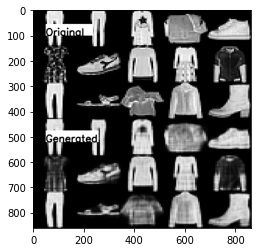

In [9]:
image = plot_original_vs_generated(X_test, predictions)
plt.imshow(image) 